In [9]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
Fish = pd.read_csv("Fish.csv")
Fish.head()

Saving Fish.csv to Fish (1).csv


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [10]:
Fish.info(memory_usage='deep')
Fish['Species'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 17.2 KB


array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(Fish['Species']) 
Fish['Species'] = label_encoder.transform(Fish['Species']) 

Fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [12]:
Fish.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [13]:
X = Fish[['Species', 'Length1', 'Length2', 'Length3', 'Height',
       'Width']].values

y = Fish['Weight'].values

In [14]:
features = pd.Series(['Species', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'])
features

0    Species
1    Length1
2    Length2
3    Length3
4     Height
5      Width
dtype: object

In [15]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
# Применим линейную регрессию к нашему набору данных 
slr.fit(X, y)
# так как у нас много признаков, а не один как в предыдушем примере,
# то у нас будет много разных коэффицентов для каждого признака
# сохраним их все в датафрейм
coeff_df = pd.DataFrame(slr.coef_, columns=['Coefficient'])  
coeff_df['features'] = features

coeff_df

,Coefficient,features
0,33.162536,Species
1,27.187334,Length1
2,50.183729,Length2
3,-50.985616,Length3
4,49.201431,Height
5,-7.573900,Width


In [16]:
slr.intercept_

-632.1541459055184

In [27]:
X = Fish[['Length3']].values
y = Fish['Weight'].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('Slope: ', slr.coef_)
print('Intercept:', slr.intercept_)

Slope:  [28.4601708]
Intercept: -490.4005915891796


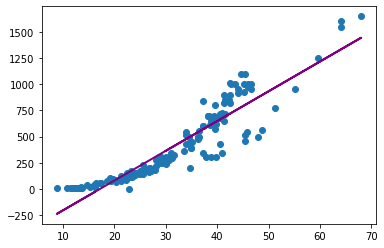

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='purple', linewidth=2)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MSE: {:.3f}'.format(mean_squared_error(y, y_pred)))

MSE: 18845.493
